<a href="https://colab.research.google.com/github/Hktips/GEN_AI_Projects/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

# **Breast Cancer Prediction**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9085 - loss: 0.4802 - val_accuracy: 0.9737 - val_loss: 0.2674
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9549 - loss: 0.2397 - val_accuracy: 0.9737 - val_loss: 0.1497
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9760 - loss: 0.1449 - val_accuracy: 0.9737 - val_loss: 0.1069
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9840 - loss: 0.0955 - val_accuracy: 0.9737 - val_loss: 0.0887
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9782 - loss: 0.0854 - val_accuracy: 0.9649 - val_loss: 0.0840
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9725 - loss: 0.0890 - val_accuracy: 0.9561 - val_loss: 0.0785
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9853 - loss: 0.0657 - val_accuracy: 0.9737 - val_loss: 0.0715
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9911 - loss: 0.0532 - val_accuracy: 0.9649 - val_loss:

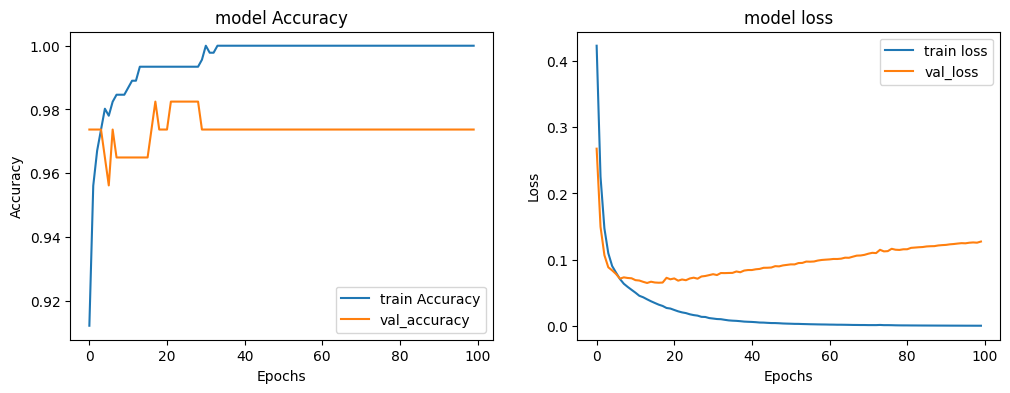

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers,models
data=load_breast_cancer()
x,y=data.data,data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model=models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc*100:.2f}%")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train Accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('model Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('model loss')
plt.show()